### Problem Statement:
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [141]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [142]:
train_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/Big Mart Sale/Train.csv'
test_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/Big Mart Sale/Test.csv'
train=pd.read_csv(train_data)
test=pd.read_csv(test_data)

In [143]:
print(train.shape)
print(test.shape)

(8523, 13)
(5681, 11)


In [70]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [72]:
train=data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [73]:
train.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [74]:
train.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

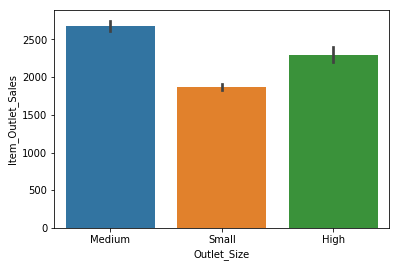

In [75]:
sb.barplot(train.Outlet_Size,train.Item_Outlet_Sales)

In [76]:
Outlet_Type_Sales=train.groupby('Outlet_Type').Item_Outlet_Sales.sum().reset_index()
Outlet_Type_Sales

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


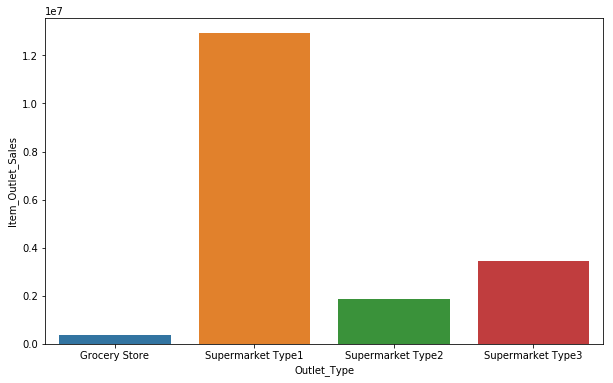

In [77]:
plt.figure(figsize=(10,6))
sb.barplot(x='Outlet_Type',y='Item_Outlet_Sales', data=Outlet_Type_Sales)

In [78]:
Outlet_Size_Sales=train.groupby('Outlet_Size').Item_Outlet_Sales.sum().reset_index()
Outlet_Size_Sales

,Outlet_Size,Item_Outlet_Sales
0,High,2.142664e+06
1,Medium,7.489719e+06
2,Small,8.958743e+06


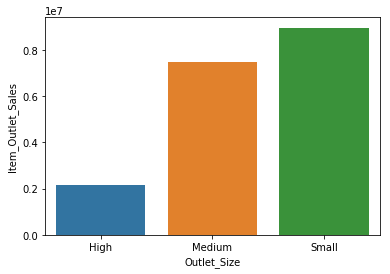

In [79]:
sb.barplot(x='Outlet_Size',y='Item_Outlet_Sales', data=Outlet_Size_Sales)

In [80]:
Item_Fat_Content_Sales=train.groupby('Item_Fat_Content').Item_Outlet_Sales.sum().reset_index()
Item_Fat_Content_Sales

,Item_Fat_Content,Item_Outlet_Sales
0,LF,6.552424e+05
1,Low Fat,1.101503e+07
2,Regular,6.457454e+06
3,low fat,2.338270e+05
4,reg,2.295765e+05


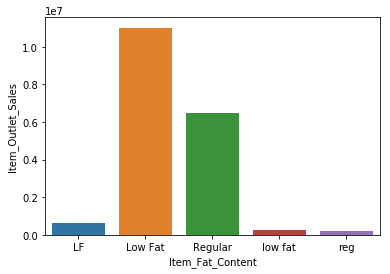

In [81]:
sb.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Item_Fat_Content_Sales)

In [82]:
Outlet_Location_Type_Sales=train.groupby('Outlet_Location_Type').Item_Outlet_Sales.sum().reset_index()
Outlet_Location_Type_Sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


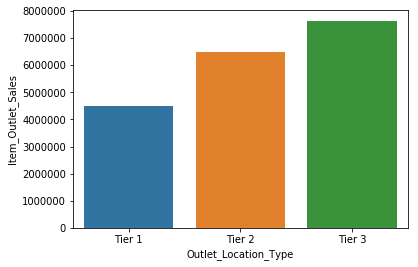

In [83]:
sb.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data=Outlet_Location_Type_Sales)

In [84]:
Item_Type_Sales=train.groupby('Item_Type').Item_Outlet_Sales.sum().reset_index()
Item_Type_Sales

,Item_Type,Item_Outlet_Sales
0,Baking Goods,1.265525e+06
1,Breads,5.532372e+05
2,Breakfast,2.322990e+05
3,Canned,1.444151e+06
4,Dairy,1.522594e+06
5,Frozen Foods,1.825735e+06
6,Fruits and Vegetables,2.820060e+06
7,Hard Drinks,4.577934e+05
8,Health and Hygiene,1.045200e+06
9,Household,2.055494e+06


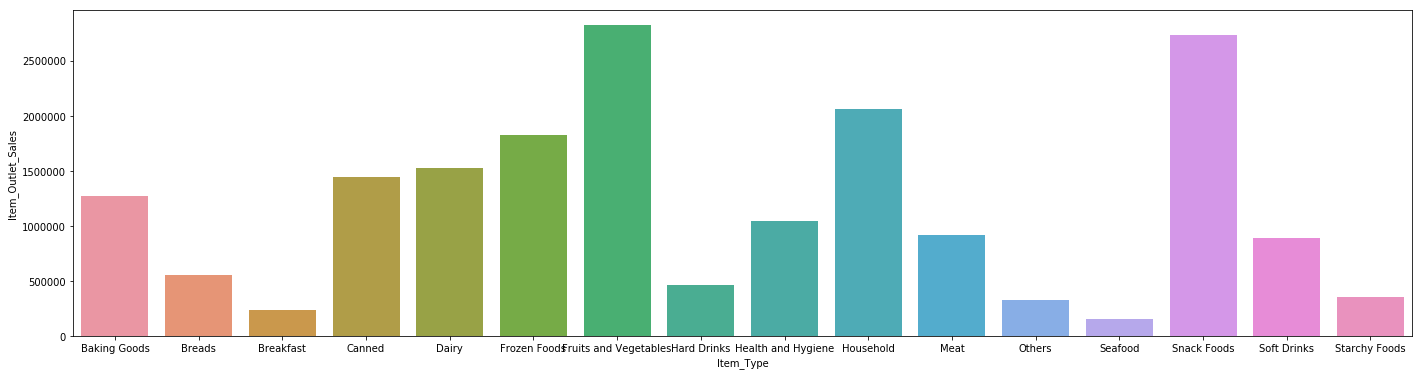

In [85]:
plt.figure(figsize=(24,6))
sb.barplot(x='Item_Type',y='Item_Outlet_Sales',data=Item_Type_Sales)

In [86]:
train['Item_Type_Derived']=train['Item_Identifier'].apply(lambda x: x[0:2])

In [87]:
train['Item_Type_Derived']=train['Item_Type_Derived'].map({'FD':'Food','DR':'Drink','NC':'Non Consumable'})

In [88]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Derived
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable


In [89]:
type(train['Item_Identifier'].map(lambda x: x[0:2]))

pandas.core.series.Series

In [90]:
train['Item_Fat_Content_Derived']=train['Item_Fat_Content'].map({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular','Low Fat':'Low Fat','Regular':'Regular'})

In [91]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Derived,Item_Fat_Content_Derived
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink,Regular
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,Regular
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable,Low Fat


In [92]:
train['Store_Age']=train['Outlet_Establishment_Year'].apply(lambda x :2013-x)

In [93]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Derived,Item_Fat_Content_Derived,Store_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink,Regular,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,Regular,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable,Low Fat,26


In [94]:
train.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
Item_Type_Derived               0
Item_Fat_Content_Derived        0
Store_Age                       0
dtype: int64

In [95]:
train.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
Item_Type_Derived                3
Item_Fat_Content_Derived         2
Store_Age                        9
dtype: int64

C:\Amrendra\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


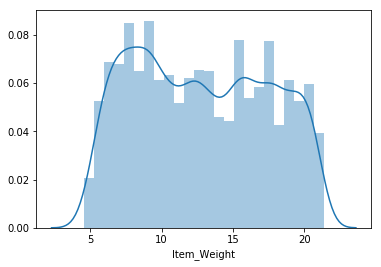

In [96]:
sb.distplot(train.Item_Weight[train.Item_Weight.isnull()==False])

In [97]:
def MRP_decode(mrp):
    if(mrp <=50):
        return 'Low'
    elif(mrp >50 and mrp <100):
        return 'medium'
    elif(mrp >100 and mrp <200):
        return 'high'
    else:
        return 'very high'

In [98]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Derived,Item_Fat_Content_Derived,Store_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink,Regular,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,Regular,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable,Low Fat,26


In [99]:
train['Price_Cat']=train.Item_MRP.apply(MRP_decode)

In [140]:
train['Sales']=math.ceil(train.Item_Outlet_Sales/train.Item_MRP)

TypeError: cannot convert the series to <class 'float'>

In [100]:
train['Item_Weight'][train.Item_Weight.isnull()==True]=train.Item_Weight.mean()

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
df1=pd.get_dummies(train['Outlet_Type'])

In [102]:
df2=pd.get_dummies(train['Outlet_Size'])

In [103]:
outlet_sixe_mode=train.groupby('Outlet_Type').Outlet_Size.apply(lambda x: x.mode())

In [104]:
missing_bool=train.Outlet_Size.isnull()

In [105]:
train.loc[missing_bool,'Outlet_Size']=train.loc[missing_bool,'Outlet_Size'].apply(lambda x:outlet_sixe_mode[1] )

In [106]:
train.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
Item_Type_Derived               0
Item_Fat_Content_Derived        0
Store_Age                       0
Price_Cat                       0
dtype: int64

In [107]:
item_mean_visibility=train.groupby('Item_Identifier').Item_Visibility.mean()

In [108]:
zero_visibility=train.Item_Visibility==0

In [109]:
train.loc[zero_visibility,'Item_Visibility']=train.loc[zero_visibility,'Item_Visibility'].apply(lambda x:item_mean_visibility[1] )

In [110]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Derived','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [111]:
train=pd.get_dummies(train,columns=['Price_Cat','Item_Fat_Content_Derived','Item_Type_Derived','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'])

In [112]:
train.drop(['Item_Fat_Content','Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [113]:
test=train[train.source=='test']
train=train[train.source=='train']


In [114]:
test.drop(['source','Item_Outlet_Sales'], axis=1,inplace=True)

In [115]:
train.drop(['source'], axis=1,inplace=True)

In [119]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Store_Age,Price_Cat_Low,Price_Cat_high,Price_Cat_medium,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,14,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,4,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,14,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.045646,19.20,OUT010,15,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.045646,8.93,OUT013,26,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [120]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 44.05 | Min - 1075 | Max - 1214


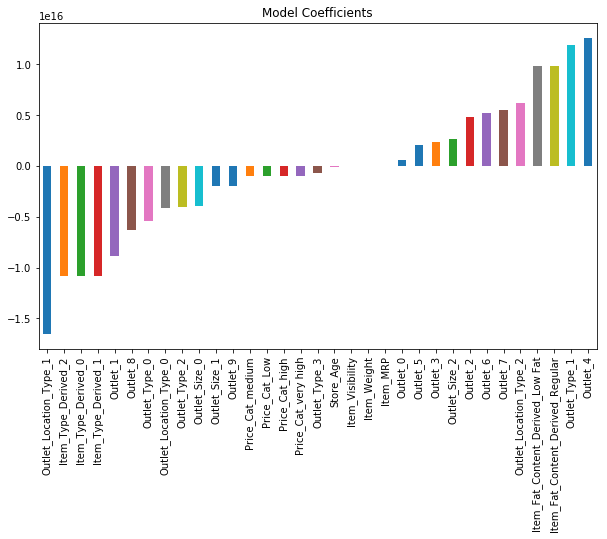

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(10,6))


Model Report
RMSE : 1130
CV Score : Mean - 1132 | Std - 42.91 | Min - 1077 | Max - 1216


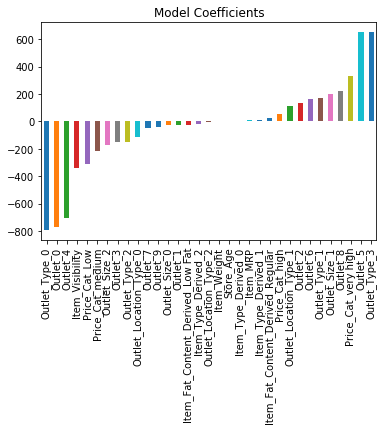

In [122]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1059
CV Score : Mean - 1092 | Std - 45.05 | Min - 1008 | Max - 1181


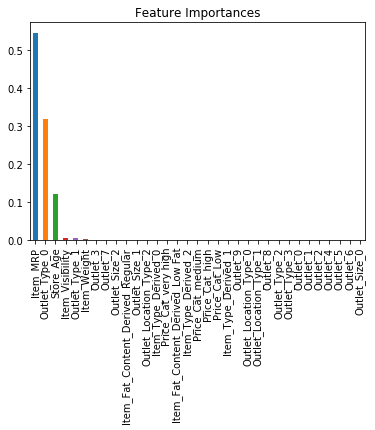

In [123]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


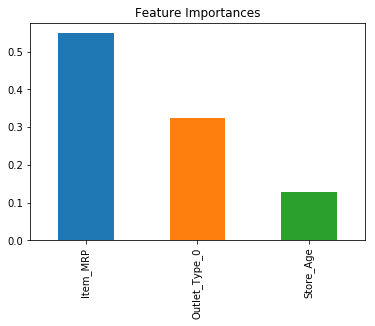

In [124]:
predictors = ['Item_MRP','Outlet_Type_0','Store_Age']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1067
CV Score : Mean - 1090 | Std - 43.49 | Min - 1026 | Max - 1176


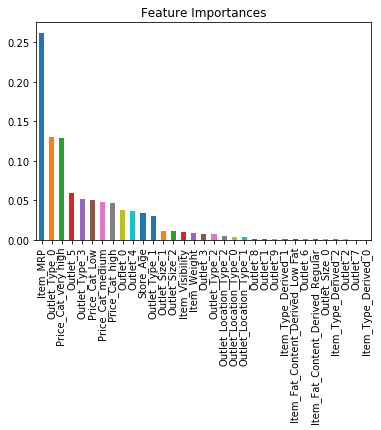

In [126]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=8,max_features=5,min_samples_leaf=20,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1049
CV Score : Mean - 1079 | Std - 43.53 | Min - 1011 | Max - 1161


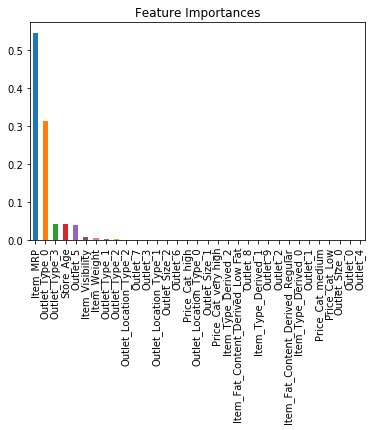

In [137]:
from sklearn.ensemble import RandomForestRegressor
#predictors = ['Item_MRP','Outlet_Type_0','Store_Age','Outlet_Type_3','Outlet_5','Item_Visibility','Item_Weight']
predictors = [x for x in train.columns if x not in [target]+IDcol]
#predictors = ['Item_MRP','Outlet_Type_0','Store_Age','Outlet_Type_3','Outlet_5','Outlet_Type_1','Outlet_4','Outlet_Size_1','Item_Visibility']
alg5 = RandomForestRegressor(n_estimators=200,max_depth=8,max_features=None,min_samples_split=80, min_samples_leaf=50,n_jobs=4,bootstrap=True)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1070
CV Score : Mean - 1082 | Std - 43.89 | Min - 1016 | Max - 1160


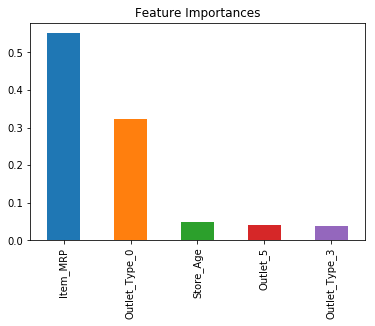

In [128]:
from sklearn.ensemble import RandomForestRegressor
predictors = ['Item_MRP','Outlet_Type_0','Store_Age','Outlet_Type_3','Outlet_5']
alg6 = RandomForestRegressor(n_estimators=200,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1061
CV Score : Mean - 1078 | Std - 44.1 | Min - 1004 | Max - 1161


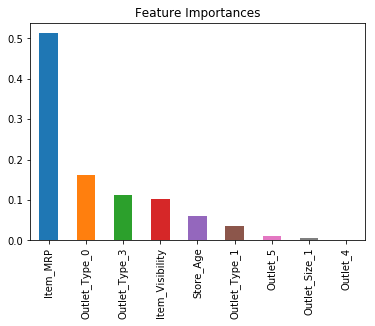

In [126]:
from xgboost.sklearn import XGBRegressor
#predictors = ['Item_MRP','Outlet_Type_0','Store_Age','Outlet_Type_3','Outlet_5','Outlet_Type_1','Outlet_4','Outlet_Size_1','Item_Visibility','Item_Weight','Outlet_Location_Type_2','Outlet_3']
predictors = ['Item_MRP','Outlet_Type_0','Store_Age','Outlet_Type_3','Outlet_5','Outlet_Type_1','Outlet_4','Outlet_Size_1','Item_Visibility']
alg7 = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=45, reg_alpha=0.1,colsample_bytree=0.9, silent=True, min_child_weight=1,objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0)
modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')
coef7 = pd.Series(alg7.feature_importances_, predictors).sort_values(ascending=False)
coef7.plot(kind='bar', title='Feature Importances')

In [67]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
from sklearn.grid_search import GridSearchCV
param_test2 = {
    'max_depth':[3,4,5,6],
    'n_estimators':[50,100,200,300,500]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(max_depth=6, 
                                                 learning_rate=0.1, 
                                                 n_estimators=200, 
                                                 silent=True, 
                                                 objective='reg:linear', 
                                                 booster='gbtree', 
                                                 n_jobs=1, 
                                                 nthread=None, 
                                                 gamma=0, 
                                                 min_child_weight=1, 
                                                 max_delta_step=0, 
                                                 subsample=1, 
                                                 reg_alpha=0,
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

SyntaxError: invalid syntax (<ipython-input-67-478fc1c9ff73>, line 22)

In [68]:
from sklearn.grid_search import GridSearchCV
param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( max_depth=6, 
                                                 learning_rate=0.1, 
                                                 n_estimators=200, 
                                                 silent=True, 
                                                 objective='reg:linear', 
                                                 booster='gbtree', 
                                                 n_jobs=1, 
                                                 nthread=None, 
                                                 gamma=0, 
                                                 min_child_weight=1, 
                                                 max_delta_step=0, 
                                                 subsample=1, 
                                                 reg_alpha=0,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

C:\Amrendra\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Amrendra\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Amrendra\Anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Amrendra\Anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x0000020E7493BC90, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Amrendra\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Amrendra...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000020E7493BC90, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Amrendra\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Amrendra...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Amrendra\Anaconda\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Amrendra\Anaconda\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(784, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Amrendra\Anaconda\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(784, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (784, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=784, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 1, 27, 341236, tzinfo=tzutc()), 'msg_id': 'b47a1ce59082436898cbf115ba986a75', 'msg_type': 'execute_request', 'session': '466cc45921384ac2ac73ac9ece0c93b5', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b47a1ce59082436898cbf115ba986a75', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'466cc45921384ac2ac73ac9ece0c93b5']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 1, 27, 341236, tzinfo=tzutc()), 'msg_id': 'b47a1ce59082436898cbf115ba986a75', 'msg_type': 'execute_request', 'session': '466cc45921384ac2ac73ac9ece0c93b5', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b47a1ce59082436898cbf115ba986a75', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'466cc45921384ac2ac73ac9ece0c93b5'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 1, 27, 341236, tzinfo=tzutc()), 'msg_id': 'b47a1ce59082436898cbf115ba986a75', 'msg_type': 'execute_request', 'session': '466cc45921384ac2ac73ac9ece0c93b5', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'b47a1ce59082436898cbf115ba986a75', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.grid_search import GridSearchCV\npar...=5)\ngsearch2.fit(train[predictors],train[target])', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-68-38012f0da25f>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 20e7fd804a8, executio...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000020E7FB8EF60, file "<ipython-input-68-38012f0da25f>", line 20>
        result = <ExecutionResult object at 20e7fd804a8, executio...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000020E7FB8EF60, file "<ipython-input-68-38012f0da25f>", line 20>, result=<ExecutionResult object at 20e7fd804a8, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000020E7FB8EF60, file "<ipython-input-68-38012f0da25f>", line 20>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'IDcol': ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales'], 'In': ['', 'import pandas as pd\nimport numpy as np\nimport seaborn as sb\nimport matplotlib.pyplot as plt', "train_data='D:/My Personal Documents/Learnings/D....read_csv(train_data)\ntest=pd.read_csv(test_data)", 'print(train.shape)\nprint(test.shape)', "train['source']='train'\ntest['source']='test'\nda...True)\nprint (train.shape, test.shape, data.shape)", 'data.describe()', 'train=data\ntrain.info()', 'train.apply(lambda x: sum(x.isnull()))', 'train.apply(lambda x: len(x.unique()))', 'sb.barplot(train.Outlet_Size,train.Item_Outlet_Sales)', "Outlet_Type_Sales=train.groupby('Outlet_Type').I...utlet_Sales.sum().reset_index()\nOutlet_Type_Sales", "plt.figure(figsize=(10,6))\nsb.barplot(x='Outlet_Type',y='Item_Outlet_Sales', data=Outlet_Type_Sales)", "Outlet_Size_Sales=train.groupby('Outlet_Size').I...utlet_Sales.sum().reset_index()\nOutlet_Size_Sales", "sb.barplot(x='Outlet_Size',y='Item_Outlet_Sales', data=Outlet_Size_Sales)", "Item_Fat_Content_Sales=train.groupby('Item_Fat_C..._Sales.sum().reset_index()\nItem_Fat_Content_Sales", "sb.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Item_Fat_Content_Sales)", "Outlet_Location_Type_Sales=train.groupby('Outlet...es.sum().reset_index()\nOutlet_Location_Type_Sales", "sb.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data=Outlet_Location_Type_Sales)", "Item_Type_Sales=train.groupby('Item_Type').Item_Outlet_Sales.sum().reset_index()\nItem_Type_Sales", "plt.figure(figsize=(24,6))\nsb.barplot(x='Item_Type',y='Item_Outlet_Sales',data=Item_Type_Sales)", ...], 'Item_Fat_Content_Sales':   Item_Fat_Content  Item_Outlet_Sales
0         ....338270e+05
4              reg       2.295765e+05, 'Item_Type_Sales':                 Item_Type  Item_Outlet_Sales
0  ...e+05
15          Starchy Foods       3.514013e+05, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {5:            Item_MRP  Item_Outlet_Sales  Item_Vis... 2004.000000  
max                  2009.000000  , 7: Item_Fat_Content                0
Item_Identifie... 0
source                          0
dtype: int64, 8: Item_Fat_Content                 5
Item_Identifi...4
source                           2
dtype: int64, 9: <matplotlib.axes._subplots.AxesSubplot object>, 10:          Outlet_Type  Item_Outlet_Sales
0      G...51823e+06
3  Supermarket Type3       3.453926e+06, 11: <matplotlib.axes._subplots.AxesSubplot object>, 12:   Outlet_Size  Item_Outlet_Sales
0        High  ...    7.489719e+06
2       Small       4.566212e+06, 13: <matplotlib.axes._subplots.AxesSubplot object>, 14:   Item_Fat_Content  Item_Outlet_Sales
0         ....338270e+05
4              reg       2.295765e+05, 15: <matplotlib.axes._subplots.AxesSubplot object>, ...}, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'IDcol': ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales'], 'In': ['', 'import pandas as pd\nimport numpy as np\nimport seaborn as sb\nimport matplotlib.pyplot as plt', "train_data='D:/My Personal Documents/Learnings/D....read_csv(train_data)\ntest=pd.read_csv(test_data)", 'print(train.shape)\nprint(test.shape)', "train['source']='train'\ntest['source']='test'\nda...True)\nprint (train.shape, test.shape, data.shape)", 'data.describe()', 'train=data\ntrain.info()', 'train.apply(lambda x: sum(x.isnull()))', 'train.apply(lambda x: len(x.unique()))', 'sb.barplot(train.Outlet_Size,train.Item_Outlet_Sales)', "Outlet_Type_Sales=train.groupby('Outlet_Type').I...utlet_Sales.sum().reset_index()\nOutlet_Type_Sales", "plt.figure(figsize=(10,6))\nsb.barplot(x='Outlet_Type',y='Item_Outlet_Sales', data=Outlet_Type_Sales)", "Outlet_Size_Sales=train.groupby('Outlet_Size').I...utlet_Sales.sum().reset_index()\nOutlet_Size_Sales", "sb.barplot(x='Outlet_Size',y='Item_Outlet_Sales', data=Outlet_Size_Sales)", "Item_Fat_Content_Sales=train.groupby('Item_Fat_C..._Sales.sum().reset_index()\nItem_Fat_Content_Sales", "sb.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Item_Fat_Content_Sales)", "Outlet_Location_Type_Sales=train.groupby('Outlet...es.sum().reset_index()\nOutlet_Location_Type_Sales", "sb.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data=Outlet_Location_Type_Sales)", "Item_Type_Sales=train.groupby('Item_Type').Item_Outlet_Sales.sum().reset_index()\nItem_Type_Sales", "plt.figure(figsize=(24,6))\nsb.barplot(x='Item_Type',y='Item_Outlet_Sales',data=Item_Type_Sales)", ...], 'Item_Fat_Content_Sales':   Item_Fat_Content  Item_Outlet_Sales
0         ....338270e+05
4              reg       2.295765e+05, 'Item_Type_Sales':                 Item_Type  Item_Outlet_Sales
0  ...e+05
15          Starchy Foods       3.514013e+05, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {5:            Item_MRP  Item_Outlet_Sales  Item_Vis... 2004.000000  
max                  2009.000000  , 7: Item_Fat_Content                0
Item_Identifie... 0
source                          0
dtype: int64, 8: Item_Fat_Content                 5
Item_Identifi...4
source                           2
dtype: int64, 9: <matplotlib.axes._subplots.AxesSubplot object>, 10:          Outlet_Type  Item_Outlet_Sales
0      G...51823e+06
3  Supermarket Type3       3.453926e+06, 11: <matplotlib.axes._subplots.AxesSubplot object>, 12:   Outlet_Size  Item_Outlet_Sales
0        High  ...    7.489719e+06
2       Small       4.566212e+06, 13: <matplotlib.axes._subplots.AxesSubplot object>, 14:   Item_Fat_Content  Item_Outlet_Sales
0         ....338270e+05
4              reg       2.295765e+05, 15: <matplotlib.axes._subplots.AxesSubplot object>, ...}, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\Amrendra\<ipython-input-68-38012f0da25f> in <module>()
     15                                                  min_child_weight=1, 
     16                                                  max_delta_step=0, 
     17                                                  subsample=1, 
     18                                                  reg_alpha=0,seed=27), 
     19                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
---> 20 gsearch2.fit(train[predictors],train[target])

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e..._jobs', refit=True, scoring='roc_auc', verbose=0), X=      Item_MRP  Outlet_Type_0  Store_Age  Outlet...    0         0.044878  

[8523 rows x 9 columns], y=0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 8523, dtype: float64)
    833         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    834             Target relative to X for classification or regression;
    835             None for unsupervised learning.
    836 
    837         """
--> 838         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...jobs', refit=True, scoring='roc_auc', verbose=0)>
        X =       Item_MRP  Outlet_Type_0  Store_Age  Outlet...    0         0.044878  

[8523 rows x 9 columns]
        y = 0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 8523, dtype: float64
        self.param_grid = {'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]}
    839 
    840 
    841 class RandomizedSearchCV(BaseSearchCV):
    842     """Randomized search on hyper parameters.

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e..._jobs', refit=True, scoring='roc_auc', verbose=0), X=      Item_MRP  Outlet_Type_0  Store_Age  Outlet...    0         0.044878  

[8523 rows x 9 columns], y=0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 8523, dtype: float64, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    569         )(
    570             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    571                                     train, test, self.verbose, parameters,
    572                                     self.fit_params, return_parameters=True,
    573                                     error_score=self.error_score)
--> 574                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    575                 for train, test in cv)
    576 
    577         # Out is a list of triplet: score, estimator, n_test_samples
    578         n_fits = len(out)

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Sep 26 10:31:29 2018
PID: 24536                    Python 3.6.5: C:\Amrendra\Anaconda\python.exe
...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1),       Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.044878

[8523 rows x 9 columns], 0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 8523, dtype: float64, make_scorer(roc_auc_score, needs_threshold=True), array([1705, 1706, 1707, ..., 8520, 8521, 8522]), array([   0,    1,    2, ..., 1702, 1703, 1704]), 0, {'max_depth': 4, 'min_child_weight': 4}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1),       Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.044878

[8523 rows x 9 columns], 0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 8523, dtype: float64, make_scorer(roc_auc_score, needs_threshold=True), array([1705, 1706, 1707, ..., 8520, 8521, 8522]), array([   0,    1,    2, ..., 1702, 1703, 1704]), 0, {'max_depth': 4, 'min_child_weight': 4}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1), X=      Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.044878

[8523 rows x 9 columns], y=0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 8523, dtype: float64, scorer=make_scorer(roc_auc_score, needs_threshold=True), train=array([1705, 1706, 1707, ..., 8520, 8521, 8522]), test=array([   0,    1,    2, ..., 1702, 1703, 1704]), verbose=0, parameters={'max_depth': 4, 'min_child_weight': 4}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1689                              " numeric value. (Hint: if using 'raise', please"
   1690                              " make sure that it has been spelled correctly.)"
   1691                              )
   1692 
   1693     else:
-> 1694         test_score = _score(estimator, X_test, y_test, scorer)
        test_score = undefined
        estimator = XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1)
        X_test =       Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.128012

[1705 rows x 9 columns]
        y_test = 0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 1705, dtype: float64
        scorer = make_scorer(roc_auc_score, needs_threshold=True)
   1695         if return_train_score:
   1696             train_score = _score(estimator, X_train, y_train, scorer)
   1697 
   1698     scoring_time = time.time() - start_time

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\cross_validation.py in _score(estimator=XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1), X_test=      Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.128012

[1705 rows x 9 columns], y_test=0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 1705, dtype: float64, scorer=make_scorer(roc_auc_score, needs_threshold=True))
   1746 def _score(estimator, X_test, y_test, scorer):
   1747     """Compute the score of an estimator on a given test set."""
   1748     if y_test is None:
   1749         score = scorer(estimator, X_test)
   1750     else:
-> 1751         score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(roc_auc_score, needs_threshold=True)
        estimator = XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1)
        X_test =       Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.128012

[1705 rows x 9 columns]
        y_test = 0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 1705, dtype: float64
   1752     if hasattr(score, 'item'):
   1753         try:
   1754             # e.g. unwrap memmapped scalars
   1755             score = score.item()

...........................................................................
C:\Amrendra\Anaconda\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(roc_auc_score, needs_threshold=True), clf=XGBRegressor(base_score=0.5, booster='gbtree', c...ight=1, seed=27, silent=True,
       subsample=1), X=      Item_MRP  Outlet_Type_0  Store_Age       ....      0         0.128012

[1705 rows x 9 columns], y=0       3735.1380
1        443.4228
2       2097...: Item_Outlet_Sales, Length: 1705, dtype: float64, sample_weight=None)
    176         """
    177         super(_ThresholdScorer, self).__call__(clf, X, y,
    178                                                sample_weight=sample_weight)
    179         y_type = type_of_target(y)
    180         if y_type not in ("binary", "multilabel-indicator"):
--> 181             raise ValueError("{0} format is not supported".format(y_type))
        y_type = 'continuous'
    182 
    183         if is_regressor(clf):
    184             y_pred = clf.predict(X)
    185         else:

ValueError: continuous format is not supported
___________________________________________________________________________